# Support Vector Regression

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sea

In [25]:
df = pd.read_csv('Position_Salaries.csv')
print(df.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [26]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values.reshape(len(df), 1)
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature scaling

In [27]:
standard_scaler_X = StandardScaler()
standard_scaler_y = StandardScaler()
X = standard_scaler_X.fit_transform(X)
y = standard_scaler_y.fit_transform(y)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [28]:
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(X, y.reshape(-1,))

SVR()

In [29]:
standard_scaler_y.inverse_transform(model.predict(standard_scaler_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

In [36]:
print(standard_scaler_X.inverse_transform(X))
print(standard_scaler_y.inverse_transform(y))
print(standard_scaler_y.inverse_transform(model.predict(X).reshape(-1,1)))

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]
[[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]


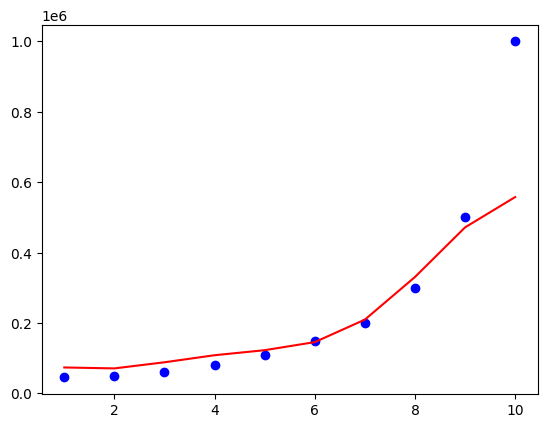

In [38]:
plt.scatter(standard_scaler_X.inverse_transform(X), standard_scaler_y.inverse_transform(y), color='blue')
plt.plot(standard_scaler_X.inverse_transform(X), standard_scaler_y.inverse_transform(model.predict(X).reshape(-1,1)), color='red')
plt.show()